In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score

In [2]:
x_train_data_path = ("./colab_workspace/colab_workspace/space_data/train_data/train_1h_max.csv")
y_train_data_path = ("./colab_workspace/colab_workspace/space_data/predict_data/predict_1h_max.csv")

X = pd.read_csv(x_train_data_path).drop(["kp"], axis = 1)
y = pd.read_csv(x_train_data_path).loc[:, ["kp"]]

In [3]:
new_df = pd.concat([X,y], axis=1).dropna()
y = new_df.pop("kp")
X = new_df

In [4]:
X = X.drop(["date"], axis =1)
X

,proton_density,proton_temperature,proton_speed,bx_gsm,by_gsm,bz_gsm,bt,ich_x,ich_y,ich_z,jj_x,jj_y,jj_z,gn_x,gn_y,gn_z
0,6.241279,76577.37,387.36032,1.365373,5.672788,0.600567,5.763508,29779.13,-4278.25,40694.08,33230.181102,-286.159383,31625.37,29648.872476,-108.229278,41083.53
3,6.813561,67664.01,378.40260,-0.581965,6.174460,-1.593402,6.897248,29756.05,-4288.25,40682.30,33210.391417,-293.578526,31612.36,29629.344341,-122.948941,41075.97
6,6.917184,79429.81,384.22640,-0.686914,6.641247,6.944213,8.015132,29760.81,-4305.17,40687.11,33212.001472,-310.976367,31621.27,29634.529857,-136.638547,41080.17
9,6.566628,110697.47,393.20218,3.735692,10.023702,1.690962,10.598715,29771.09,-4296.02,40688.76,33220.962782,-303.387349,31624.04,29643.270732,-125.978862,41081.21
12,6.216072,200632.03,460.29530,8.882007,9.846230,9.389044,17.023562,29738.60,-4288.57,40691.35,33188.173336,-303.197334,31622.28,29610.383454,-124.738893,41081.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70113,10.770000,256008.00,458.40000,2.450000,3.650000,3.200000,4.070000,29767.41,-4150.96,41045.77,33215.171285,-651.444718,31964.67,29628.571043,-456.985646,41413.89
70116,6.740000,129209.00,431.30000,2.410000,4.420000,-0.430000,4.870000,29770.47,-4152.61,41045.63,33218.757847,-652.474145,31964.66,29631.557913,-458.455128,41413.30
70119,7.860000,91233.00,435.40000,1.450000,4.920000,3.350000,5.240000,29775.79,-4142.71,41046.29,33222.570160,-645.198276,31966.89,29637.027073,-449.078408,41416.61
70122,10.090000,93252.00,431.50000,2.180000,4.150000,5.230000,5.930000,29776.17,-4155.73,41045.82,33224.150389,-655.502417,31967.44,29637.257036,-461.923889,41414.04


In [5]:
y

0        3.0
3        3.0
6        1.0
9        3.0
12       4.0
        ... 
70113    1.0
70116    2.0
70119    3.0
70122    1.0
70125    2.0
Name: kp, Length: 23376, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [69]:
xgb_model = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.08, gamma=3, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

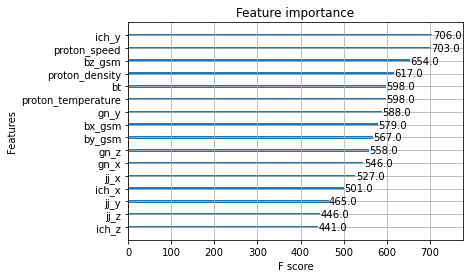

In [70]:
xgboost.plot_importance(xgb_model)

In [71]:
predictions = xgb_model.predict(X_test)
predictions

array([3.6223972, 1.2022824, 3.2435148, ..., 2.7036362, 2.982007 ,
       1.6225045], dtype=float32)

In [72]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)

0.742579956111719


In [74]:
y_pred = xgb_model.predict(X_val)
y_pred

sklearn.metrics.mean_squared_error(y_val, y_pred)

0.506141378092141

In [75]:
predict_df = pd.read_csv("./colab_workspace/colab_workspace/space_data/predict_data/predict_3h_max.csv")
predict_df.drop(["date"],axis=1,inplace=True)

In [76]:
result = xgb_model.predict(predict_df)[-480:]

In [77]:
save_path = "lazypredict_colli5.xlsx"

df = pd.read_excel("./colab_workspace/colab_workspace/file/quiz.xlsx")
df["정답"] = result
df.to_excel(save_path, index=False)

In [78]:
result = np.round(result,0)

save_path = "lazypredict_colli5_round.xlsx"

df = pd.read_excel("./colab_workspace/colab_workspace/file/quiz.xlsx")
df["정답"] = result
df.to_excel(save_path, index=False)